# Explore here

In [4]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import *
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import os
from PIL import Image
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from keras.preprocessing import image

In [22]:
import os
import shutil
folder_path_train = "/workspaces/machine-learning-python-template-bielimages/train"
# Crear carpetas para cada clase si no existen
os.makedirs(os.path.join(folder_path_train, "cats"), exist_ok=True)
os.makedirs(os.path.join(folder_path_train, "dogs"), exist_ok=True)

# Mover las imágenes a sus respectivas carpetas
for filename in os.listdir(folder_path_train):
    if filename.startswith("cat."):
        shutil.move(os.path.join(folder_path_train, filename), os.path.join(folder_path_train, "cats", filename))
    elif filename.startswith("dog."):
        shutil.move(os.path.join(folder_path_train, filename), os.path.join(folder_path_train, "dogs", filename))






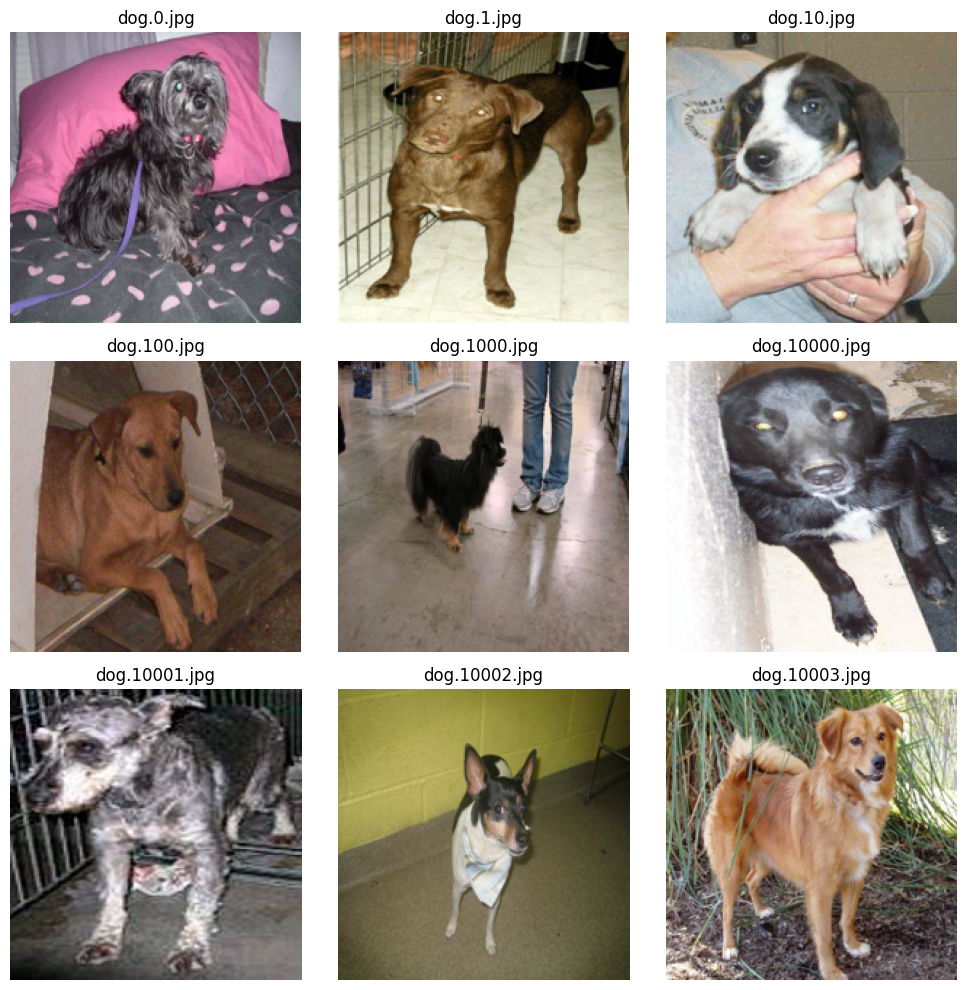

In [16]:
# Declaramos la ruta de la carpeta donde estan cargadas todas las fotos de train y de test
folder_path_train1 = "/workspaces/machine-learning-python-template-bielimages/train/dogs"
# Obtenemos la lista de archivos que comienzan con "dog."
dog_images = sorted([f for f in os.listdir(folder_path_train1) if f.startswith("dog.")])

# Seleccionamos las primeras 9 imagenes
dog_images = dog_images[:9]

# Creamos la figura para mostrar las imágenes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_name in zip(axes.flatten(), dog_images):
    img_path = os.path.join(folder_path_train1, img_name)
    img = Image.open(img_path).resize((200,200))
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.tight_layout()
plt.show()


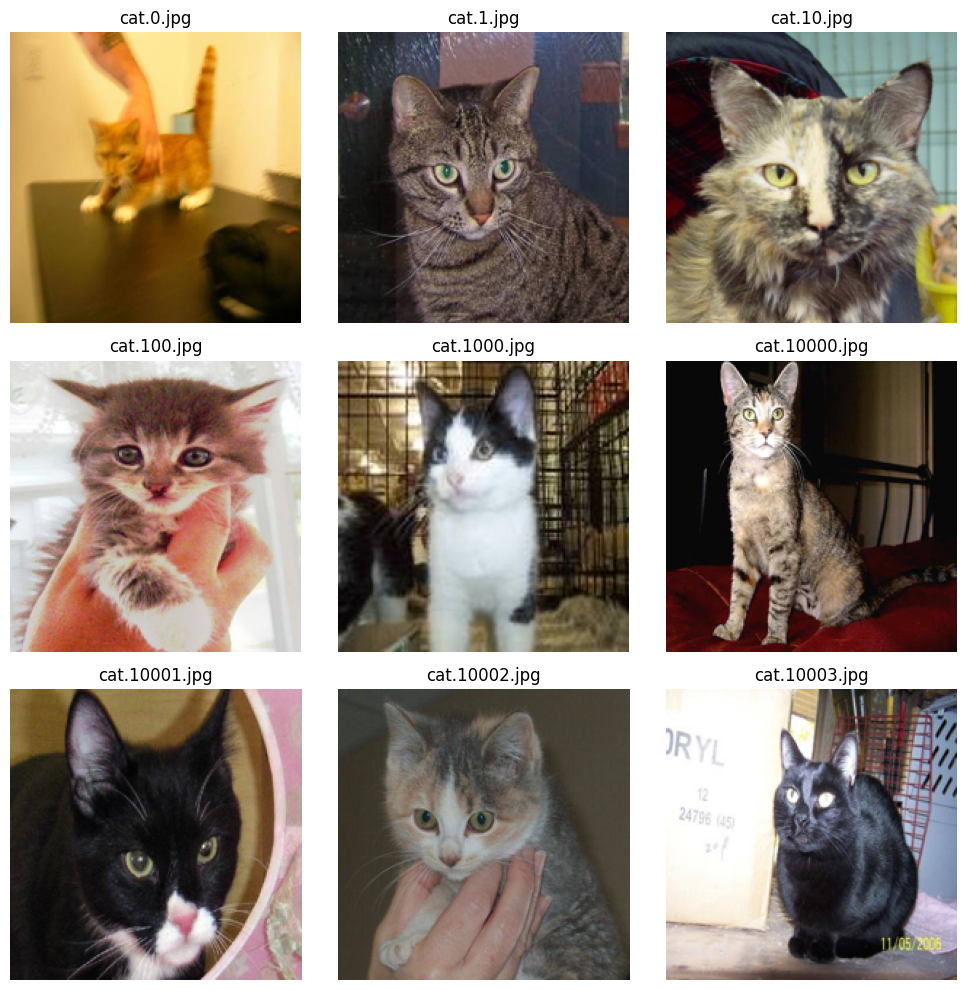

In [17]:
folder_path_train2 = "/workspaces/machine-learning-python-template-bielimages/train/cats"
# Obtenemos la lista de archivos que comienzan con "cat."
dog_images = sorted([f for f in os.listdir(folder_path_train2) if f.startswith("cat.")])

# Seleccionamos las primeras 9 imagenes
dog_images = dog_images[:9]

# Creamos la figura para mostrar las imágenes
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax, img_name in zip(axes.flatten(), dog_images):
    img_path = os.path.join(folder_path_train2, img_name)
    img = Image.open(img_path).resize((200,200))
    ax.imshow(img)
    ax.set_title(img_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definimos DataGen
test_dir = "/workspaces/machine-learning-python-template-bielimages/"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    folder_path_train,
    target_size = image_size,
    batch_size=4,
    classes = ["dogs", "cats"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    batch_size=4,
    classes = ["test1"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))


model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-07 17:26:53.019734: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
# Compilamos modelo
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# entrenmaos el modeolo /// Aqui tengo problemas con el kernel he intentado casi todo bajando el bach size y el epochs a lo minimo
model.fit(train_data, epochs = 1)

/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   2/6250 ━━━━━━━━━━━━━━━━━━━━ 6:10:56 4s/step - accuracy: 0.3750 - loss: 3137.5288

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: detiene el entrenamiento si la validación no mejora
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint: guarda el modelo con la mejor performance
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')


In [ ]:
# Entrenamos el modelo con EarlyStopping y ModelCheckpoint
history = model.fit(
    train_data,
    epochs=1, 
    validation_data=test_data,  
    callbacks=[early_stop, checkpoint]
)

In [ ]:
# Cargar el mejor modelo
best_model = keras.models.load_model('best_model.h5')

In [ ]:
# Usamos el conjunto de test para hacer predicciones
predictions = best_model.predict(test_data)

predicted_classes = tf.argmax(predictions, axis=1)